In [1]:
# 讀入資料
import numpy as np
import pandas as pd

columns = ['id', 'age', 'prescription', 'astigmatic', 'rate', 'class']

#drive
lense_file = './lenses.data'
lense_data = pd.read_csv(lense_file, header=None, sep='\s+', names=columns, index_col=0)

print(lense_data.shape)
print(lense_data)

(24, 5)
    age  prescription  astigmatic  rate  class
id                                            
1     1             1           1     1      3
2     1             1           1     2      2
3     1             1           2     1      3
4     1             1           2     2      1
5     1             2           1     1      3
6     1             2           1     2      2
7     1             2           2     1      3
8     1             2           2     2      1
9     2             1           1     1      3
10    2             1           1     2      2
11    2             1           2     1      3
12    2             1           2     2      1
13    2             2           1     1      3
14    2             2           1     2      2
15    2             2           2     1      3
16    2             2           2     2      3
17    3             1           1     1      3
18    3             1           1     2      3
19    3             1           2     1      3
20   

In [2]:
# 處理資料
# attribute :  age  prescription  astigmatic  rate
idx_data = [i for i in range(lense_data.shape[1]) if i!=4]

# attribute :  class
idx_label = [4]

lense_data = lense_data.values

train_data = lense_data[:, idx_data]
train_label = lense_data[:, idx_label]

In [3]:
# 建立決策樹分類器
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 0)
classifier.fit(train_data, train_label)

# 預測結果
#classifier.predict(train_data)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

[Text(111.60000000000001, 195.696, 'rate <= 1.5\nentropy = 1.326\nsamples = 24\nvalue = [4, 5, 15]'),
 Text(74.4, 152.208, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12]'),
 Text(148.8, 152.208, 'astigmatic <= 1.5\nentropy = 1.555\nsamples = 12\nvalue = [4, 5, 3]'),
 Text(74.4, 108.72, 'age <= 2.5\nentropy = 0.65\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(37.2, 65.232, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(111.60000000000001, 65.232, 'prescription <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(74.4, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(148.8, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(223.20000000000002, 108.72, 'prescription <= 1.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 0, 2]'),
 Text(186.0, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(260.40000000000003, 65.232, 'age <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(223.20000000000002, 21.744, 'entropy = 0.0\nsample

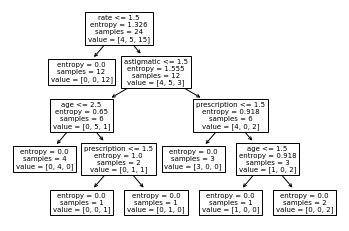

In [4]:
# 繪製圖形
from sklearn import tree
tree.plot_tree(classifier, feature_names = ['age', 'prescription', 'astigmatic', 'rate'])

In [6]:
# 繪製圖形
import graphviz
from sklearn.tree import export_graphviz
tree_dot = export_graphviz(classifier, out_file = None, feature_names=['age', 'prescription', 'astigmatic', 'rate'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(tree_dot)
graph.render("tree")

'tree.pdf'